In [14]:
%matplotlib inline
# notebook
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
import pandas as pd
import networkx as nx
from math import sin, cos, sqrt, atan2, radians
from utils import *
from data import *
from trophics import *
from collections import defaultdict
#make the graphs bigger
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [15]:
rawEiggData = validatedEiggData()
# rawEiggData = rawEiggData[rawEiggData["Start date year"] > 1960]
rawEiggData.head()

C:\Users\davie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2862: DtypeWarning: Columns (9,22) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Recorder,Latitude (WGS84),Longitude (WGS84),Start date year,End date year,Scientific name,Common name
0,unknown,56.902729,-6.15936,1905.0,NaN,meloe violaceus,Violet Oil-beetle
1,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,rhantus suturellus,NaN
2,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,gyrinus substriatus,NaN
3,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,enochrus fuscipennis,NaN
4,Frank Balfour-Browne,56.899200,-6.19759,1910.0,1910.0,boreonectes multilineatus,NaN


In [16]:
foodWeb = retrieveCollatedFoodWeb()
len(foodWeb)

5565

In [24]:
for item in foodWeb:
    item = item.split(" ")
    item = " ".join(item[:2])
    overall.add(item)

for fw in foodWeb:
    v = foodWeb[fw]
    for item in v:
        item = item.split(" ")
        item = " ".join(item[:2])
        overall.add(item)
        
for item in dc:
    overall.add(item)

print(len(overall))

7879


In [5]:
eiggSpecies = rawEiggData['Scientific name'].str.lower()
eiggSpecies = set(eiggSpecies)

iset = set()
animalsTotal = len(eiggSpecies)
totalFound = 0
for item in eiggSpecies:
    if item in overall:
        iset.add(item)
        totalFound += 1

print(totalFound / animalsTotal)

0.19416498993963782


In [6]:
len(iset),(animalsTotal)

(579, 2982)

In [13]:
"cerastium glomeratum" in overall

False

# Reproduction of manually made network

In [250]:
finalDf = rawEiggData[(rawEiggData['Start date year'] > 2010.0)]

In [251]:
finalDfSpecies = finalDf['Scientific name']
vals = finalDfSpecies.values.tolist()
onlyAnimals = set(vals)
len(onlyAnimals)

1040

In [252]:
found = []
for i in onlyAnimals:
    if i in overall:
        found.append(i)

In [253]:
scientific = list(finalDf['Scientific name'])
common = list(finalDf['Common name'])
len(scientific),len(common)
mapping = {}
for i in range(min(len(scientific), len(common))):
    mapping[scientific[i]] = common[i]
mapping['Delphinidae'] = "Dolphin"
mapping['Arion (Carinarion) circumscriptus'] = "Slug"

for key in mapping:
    if type(mapping[key]) is not str:
        mapping[key] = key

In [264]:
foundCommon = list(map(lambda x: mapping[x], found))

In [265]:
G = nx.Graph()
for k,i in enumerate(found): G.add_node(k)

In [266]:
def drawEdges(G,animals):
    for k1, a in enumerate(animals):
        predatorFoodWeb = foodWeb[a]
#         print(a)
#         print(predatorFoodWeb)
#         print("----------------")
        for k2,b in enumerate(animals):
            if b in predatorFoodWeb:
                #print(a + " ---- " + b)
                G.add_edge(k1,k2)
                

99


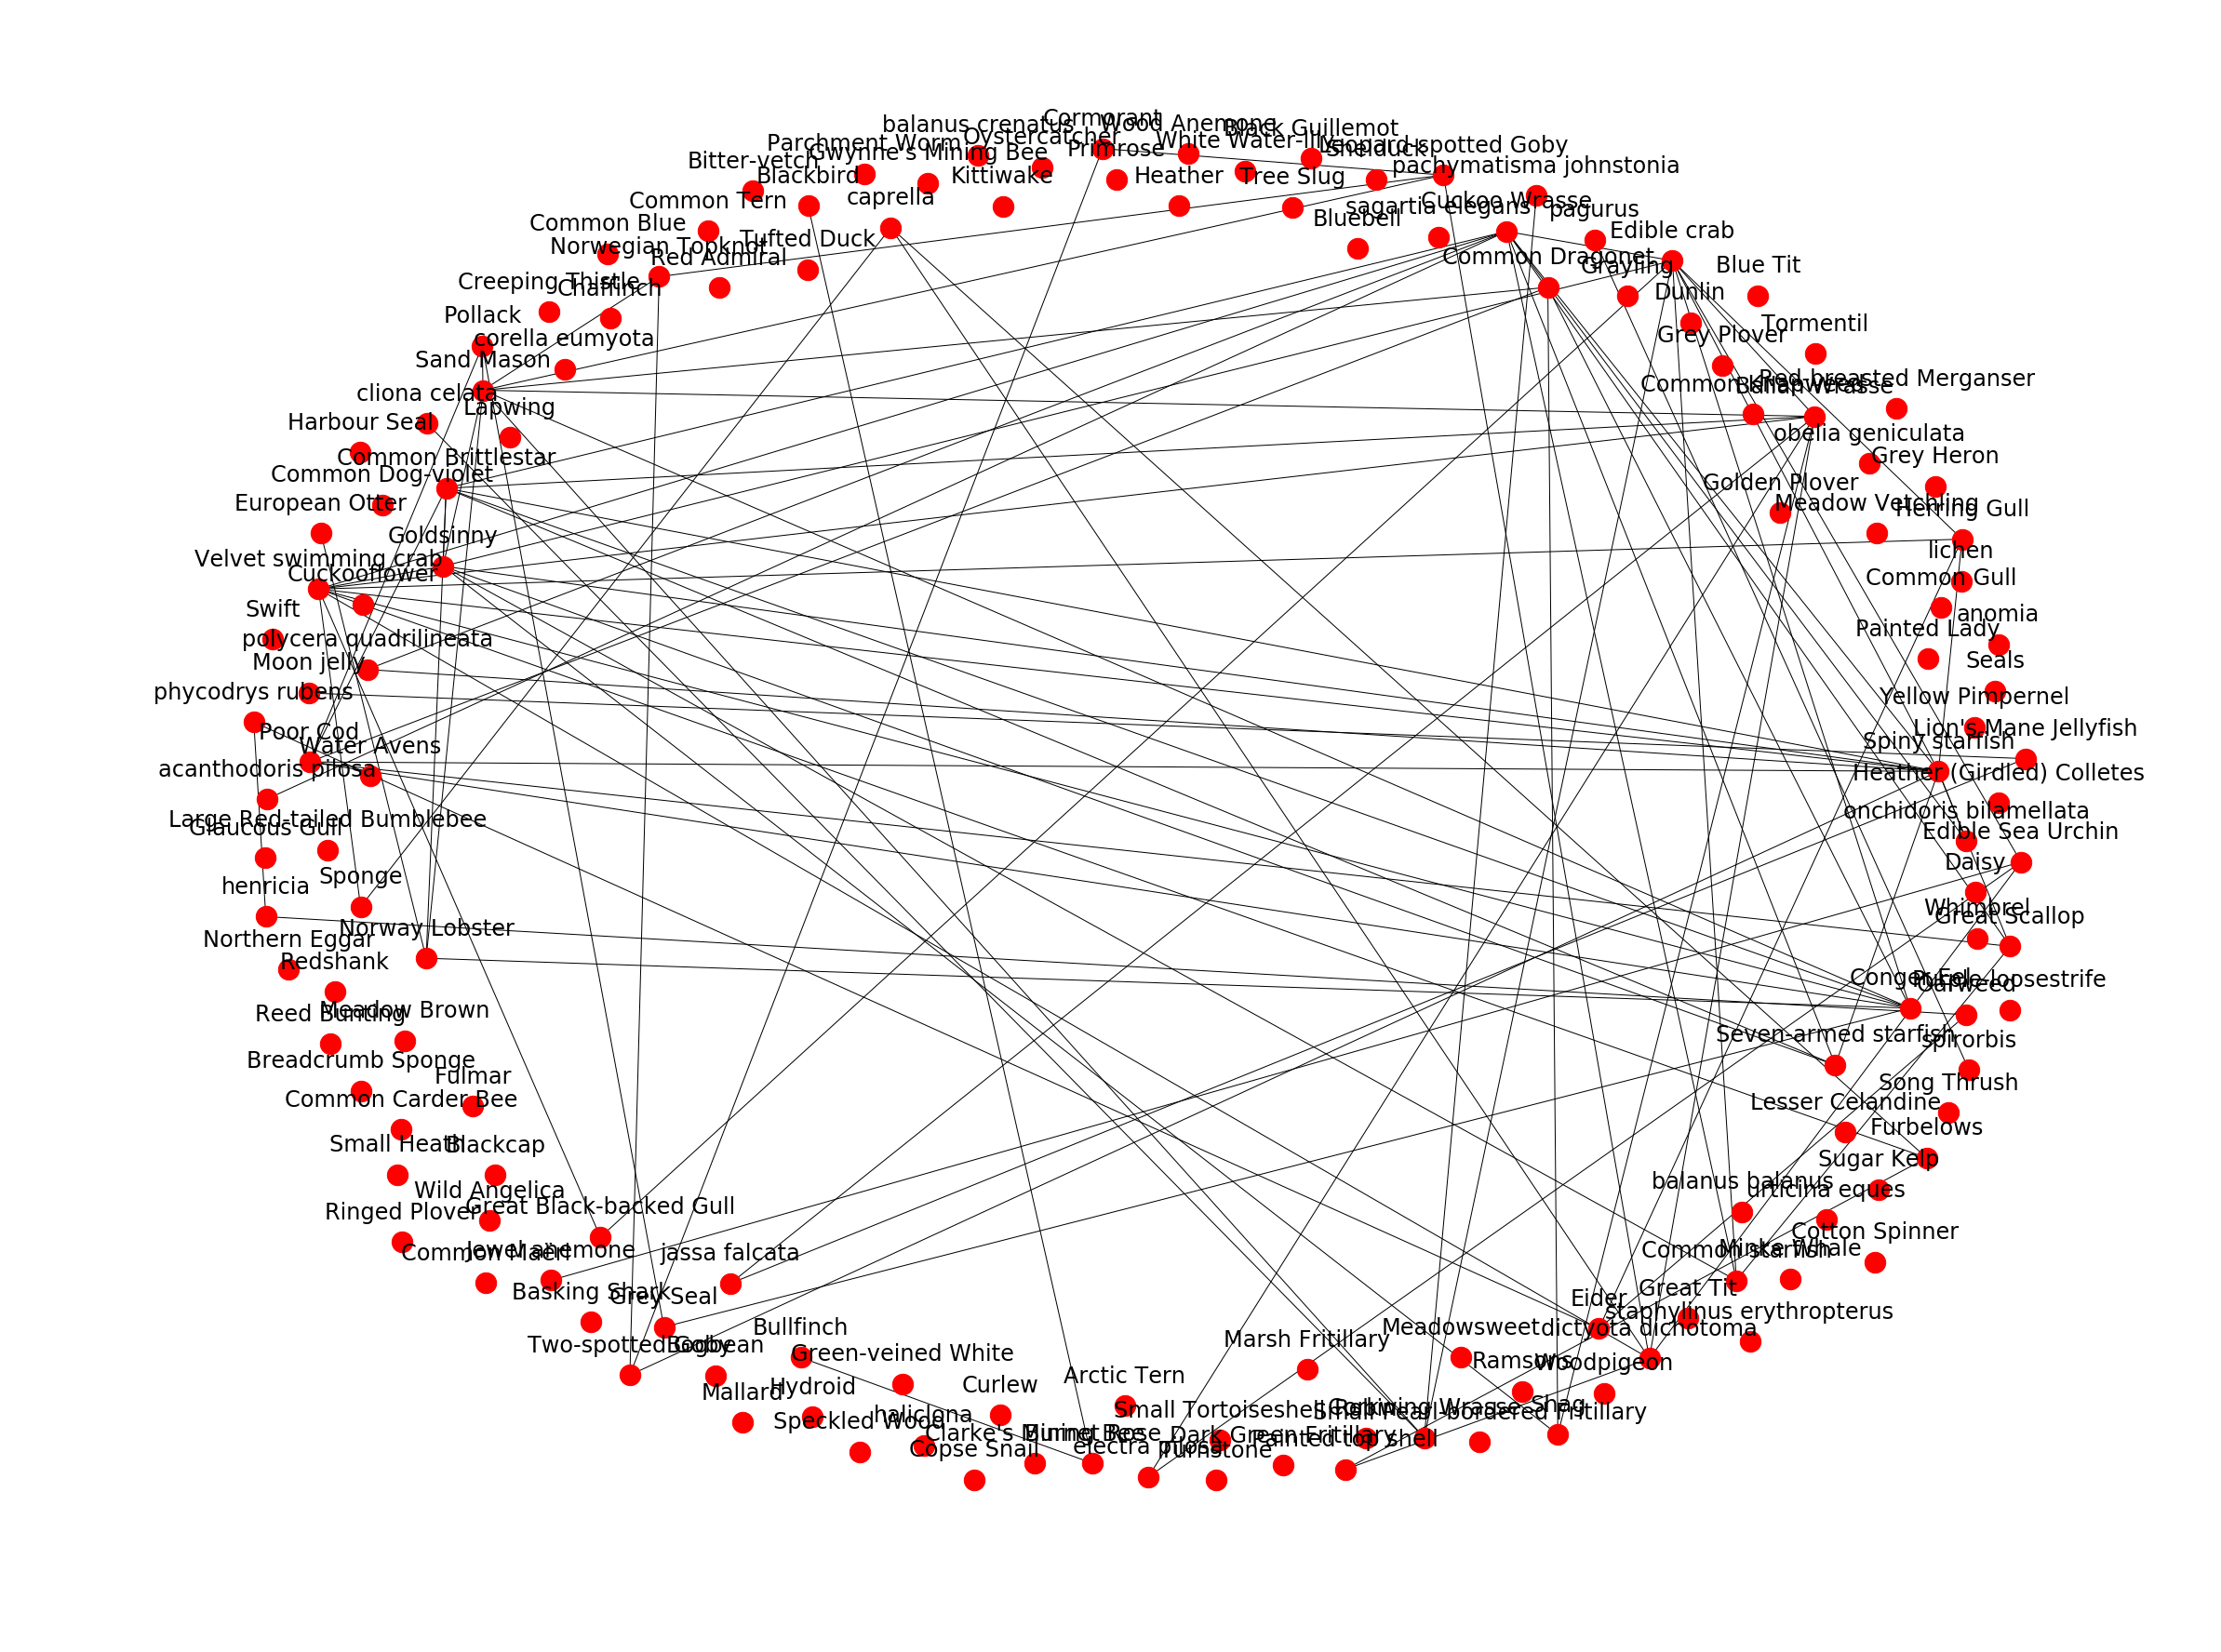

In [267]:
pos=nx.spring_layout(G,k=1)
labels={}
for k,i in enumerate(found): labels[k] = i
drawEdges(G, found)
nx.draw(G, pos, node_size=500)
print(len(G.edges))
for label in pos:
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[labels[label]],horizontalalignment='center',fontsize=24)
    

In [268]:
remove = [node for node,degree in G.degree() if degree == 0]
G.remove_nodes_from(remove)
print(list(map(lambda x: mapping[labels[x]],remove)))

['Turnstone', 'Primrose', 'Tormentil', 'Curlew', 'Painted Lady', 'Woodpigeon', 'Copse Snail', 'Great Tit', 'balanus balanus', 'Meadowsweet', 'haliclona', 'Meadow Brown', 'urticina eques', 'Song Thrush', 'Hydroid', 'Redshank', 'Mallard', 'Common Carder Bee', 'Seals', 'Bitter-vetch', 'Lapwing', 'Oystercatcher', 'Purple-loosestrife', 'Grey Plover', 'Water Avens', 'Creeping Thistle', 'Grayling', 'Large Red-tailed Bumblebee', 'Cuckooflower', 'Wood Anemone', 'Minke Whale', 'Common Maërl', 'balanus crenatus', 'Sugar Kelp', 'Swift', 'Cotton Spinner', 'Daisy', 'anomia', 'Northern Eggar', 'Yellow Pimpernel', 'Speckled Wood', 'Common Gull', 'Bogbean', 'Small Heath', 'Kittiwake', 'lichen', 'Golden Plover', 'Glaucous Gull', 'Chaffinch', 'Robin', 'Heather', 'Red Admiral', 'Ringed Plover', 'Ramsons', 'Arctic Tern', 'Shelduck', 'Dark Green Fritillary', 'Reed Bunting', 'Small Tortoiseshell', 'Blackcap', 'sagartia elegans', 'Heather (Girdled) Colletes', 'Common Tern', 'Parchment Worm', 'Marsh Fritillary

99


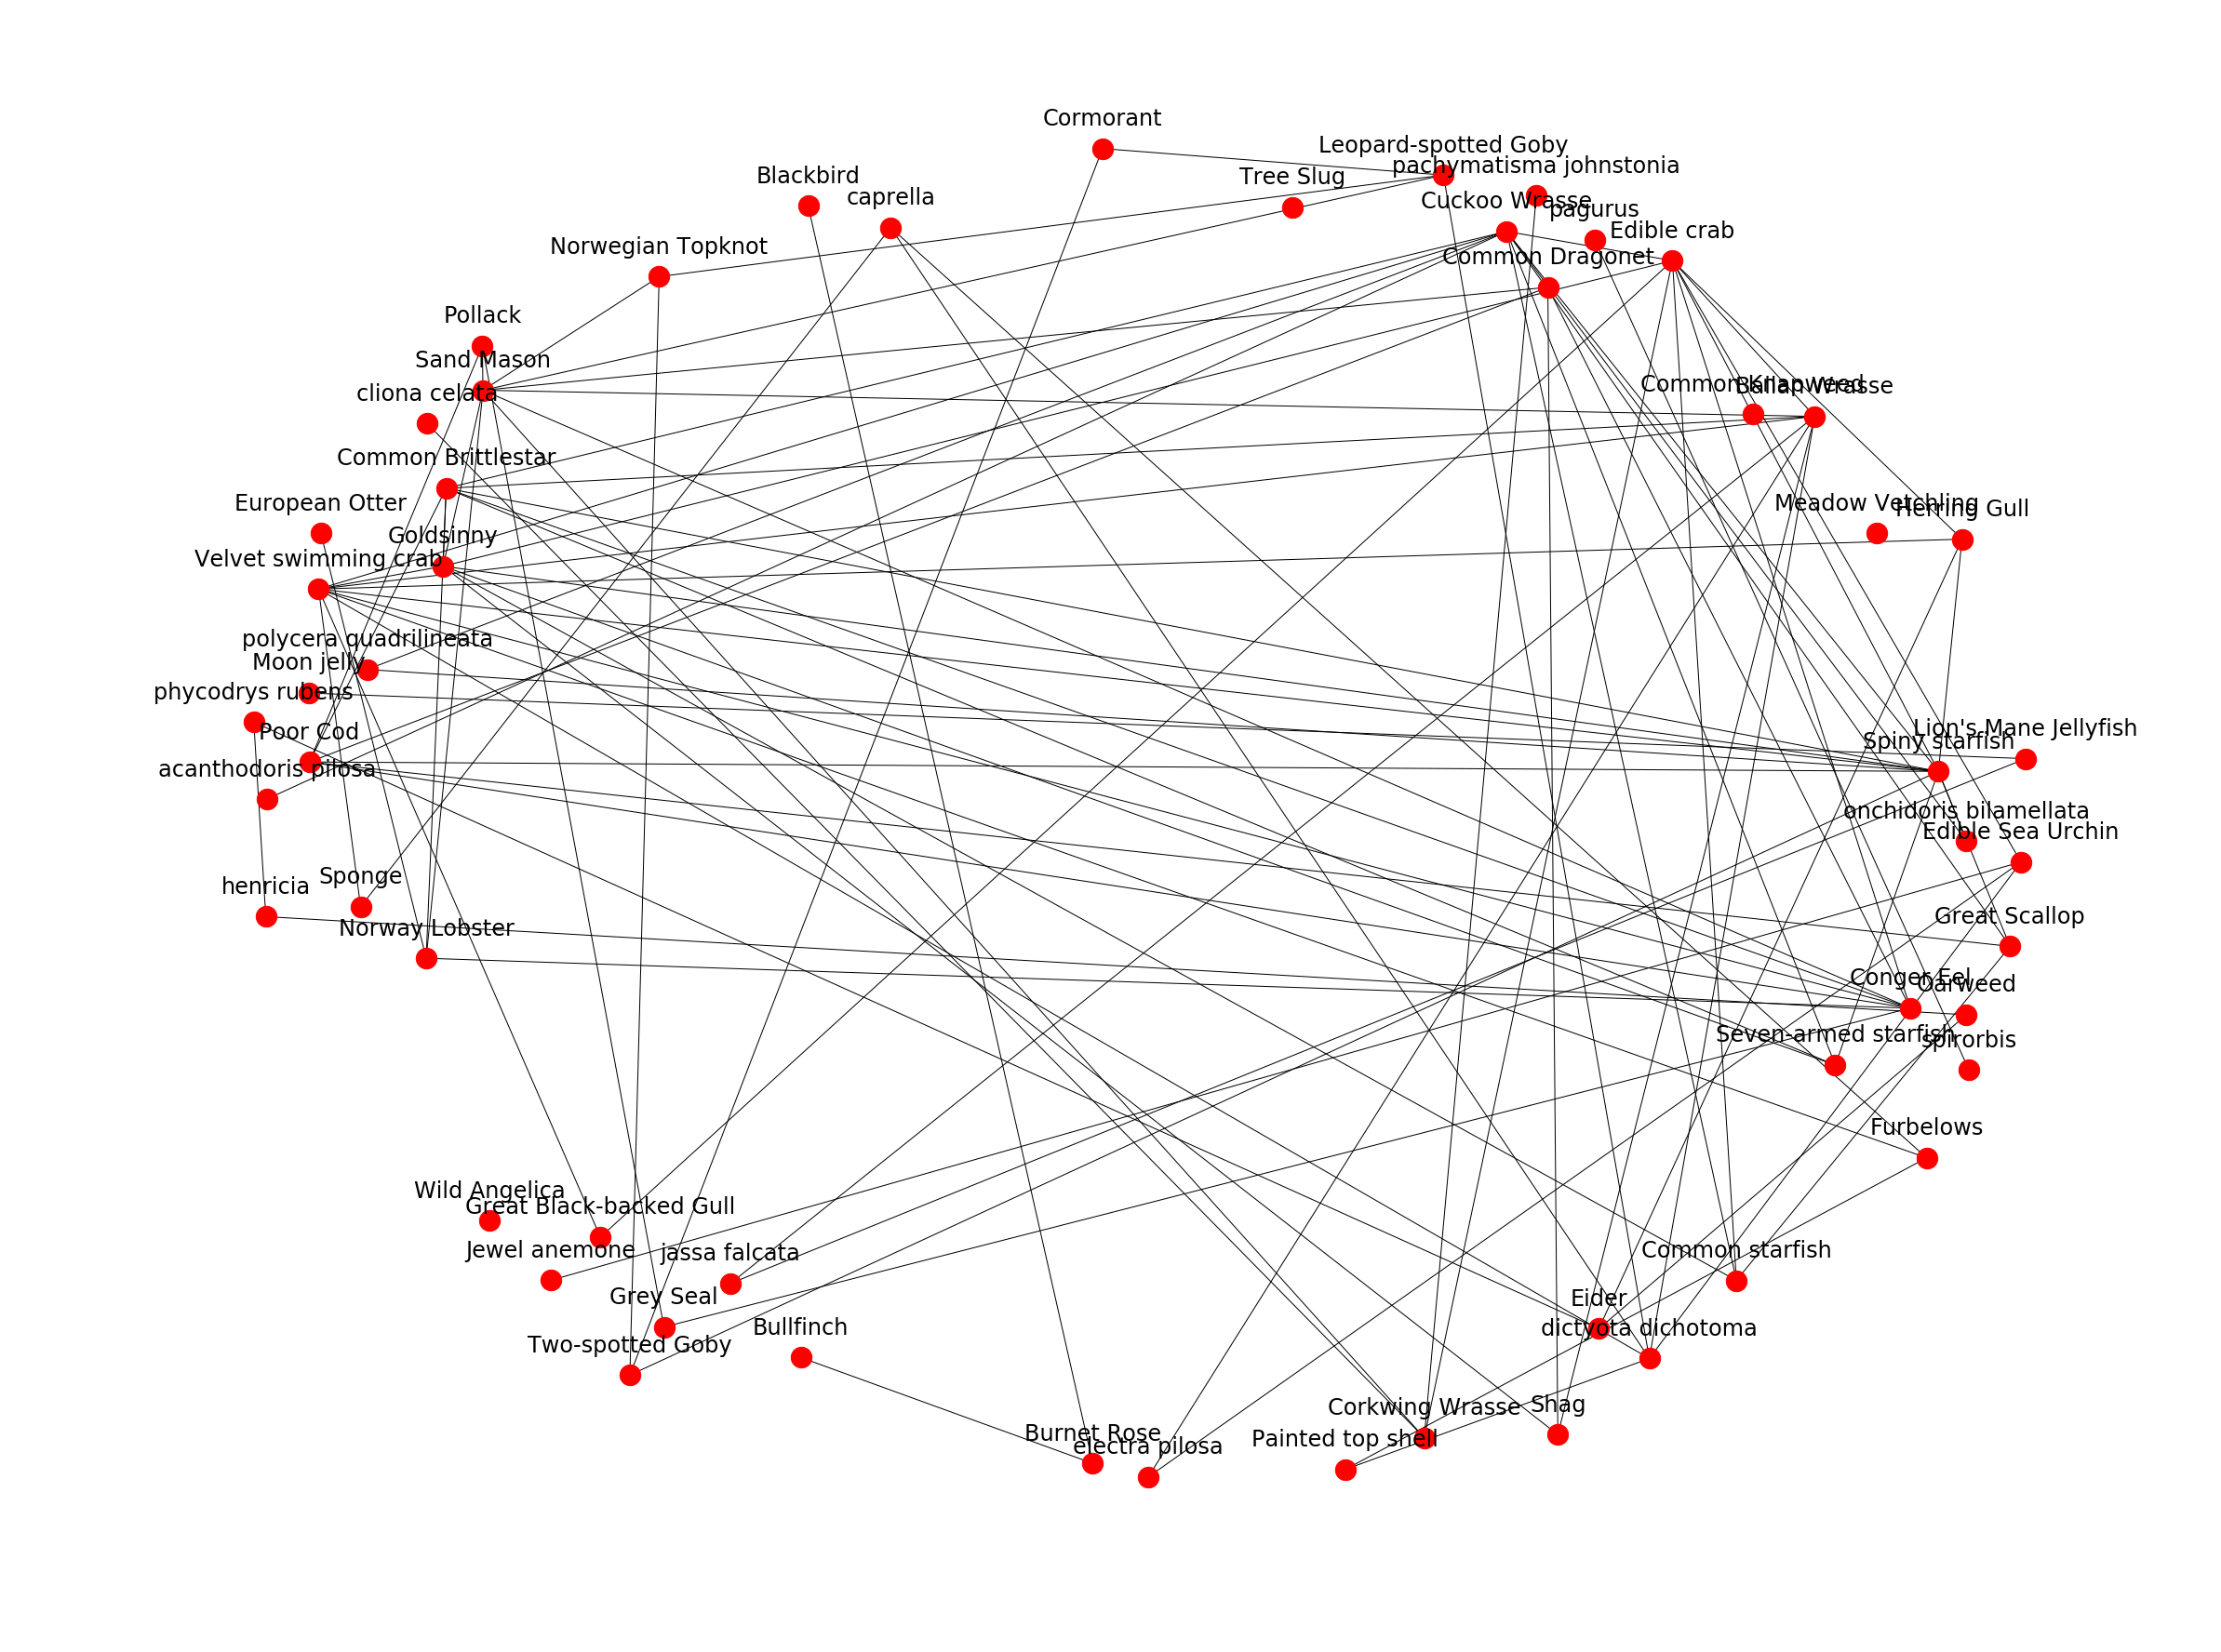

In [269]:
nx.draw(G, pos, node_size=500)
print(len(G.edges))
for label in pos:
    if label in remove: continue
    x,y = pos[label]
    plt.text(x,y+0.035,s=mapping[labels[label]],horizontalalignment='center',fontsize=24)


In [272]:
connected = list(map(lambda x: labels[x[0]],G.degree()))
len(connected)
# ['', 'superkingdom', 'kingdom', 'phylum', 'subphylum', '', '', '', '', '', '', '', '', '', '', '', 'order', 'family', 'subfamily', '', 'genus', 'species']

55

In [303]:
def findType(groups,values,granularity):
    consumableGroup = groups.lower().split("|")
    consumableValues = values.lower().split("|")
    
    accessable = dict(zip(consumableGroup,consumableValues))
    if granularity in accessable:
        return accessable[granularity]
    else:
        return [groups,values]
    
def getSpeciesType(name, granularity):
    callToValidateName = requests.get('http://resolver.globalnames.org/name_resolvers.json?names='+name)
    jsonRes = callToValidateName.json()['data'][0]["results"][0]
    groups,values = jsonRes["classification_path_ranks"], jsonRes["classification_path"]
    return findType(groups,values,granularity)

def groupDataByType(species,granularity):
    types = list(map(lambda x: getSpeciesType(x, granularity), species))
    return dict(zip(species,types))

res = groupDataByType(connected, "kingdom")
len(res)

55

In [305]:
res

{'acanthodoris pilosa': 'metazoa',
 'angelica sylvestris': 'viridiplantae',
 'asterias rubens': 'metazoa',
 'aurelia aurita': 'metazoa',
 'callionymus lyra': 'metazoa',
 'calliostoma zizyphinum': 'metazoa',
 'cancer pagurus': 'animalia',
 'caprella': 'animalia',
 'centaurea nigra': 'plantae',
 'cliona celata': 'metazoa',
 'conger conger': 'metazoa',
 'corynactis viridis': 'animalia',
 'ctenolabrus rupestris': 'metazoa',
 'cyanea capillata': 'metazoa',
 'dictyota dichotoma': ['|superkingdom|||class|order|family|genus|species',
  '|Eukaryota|Stramenopiles||Phaeophyceae|Dictyotales|Dictyotaceae|Dictyota|Dictyota dichotoma'],
 'echinus esculentus': 'animalia',
 'electra pilosa': 'metazoa',
 'gobiusculus flavescens': 'metazoa',
 'halichoerus grypus': 'metazoa',
 'henricia': 'animalia',
 'jassa falcata': 'metazoa',
 'labrus bergylta': 'metazoa',
 'labrus mixtus': 'metazoa',
 'laminaria digitata': 'chromista',
 'lanice conchilega': 'metazoa',
 'larus argentatus': 'metazoa',
 'larus marinus': 